<a href="https://colab.research.google.com/github/yudam-J/KDC-classification-with-BERT/blob/main/KDC_classification(KoBERT_%EC%B5%9C%EC%86%8C%EB%A0%88%EC%BD%94%EB%93%9C_25_2_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Functions & Module Import

In [1]:
import pandas as pd
import os
import sys
import urllib.request
import json
import re
import numpy as np
from google.colab import drive
from glob import glob

# drive.mount('/content/drive/')
# os.chdir('/content/drive/MyDrive/work_dir')

pd.set_option('display.float_format', '{:.0f}'.format)

In [3]:
combined_df = pd.read_csv('/content/kdc_data.csv', low_memory=False)

#Data Preprocessing

## (1) Data Load and Combine

In [ ]:
"""
ÏßÄÏ†ïÎêú Í≤ΩÎ°úÏùò ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ëÌï©Ìï©ÎãàÎã§.
"""
csv_files = glob(os.path.join('/content/drive/MyDrive/work_dir', "NL_BO_SPECIES_MASTER_NEW*.csv"))

# Í∞Å ÌååÏùºÏùÑ ÏùΩÍ≥† Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌïòÏó¨ Î≥ëÌï©
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í≤∞Ìï©
df_2 = pd.concat(dataframes, ignore_index=True)

<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (6,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (6,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (1,6,7,9,10,11,12,13,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-4-15d402cc761f>:9: DtypeWarning: Columns (1,7,10,11,12,13,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read

In [ ]:
df_2.columns

Index(['SEQ_NO', 'ISBN_THIRTEEN_NO', 'VLM_NM', 'TITLE_NM', 'AUTHR_NM',
       'PUBLISHER_NM', 'PBLICTE_DE', 'ADTION_SMBL_NM', 'PRC_VALUE',
       'IMAGE_URL', 'BOOK_INTRCN_CN', 'KDC_NM', 'TITLE_SBST_NM',
       'AUTHR_SBST_NM', 'TWO_PBLICTE_DE', 'INTNT_BOOKST_BOOK_EXST_AT',
       'PORTAL_SITE_BOOK_EXST_AT', 'ISBN_NO'],
      dtype='object')

In [ ]:
df_2 = df_2[["TITLE_NM", "ISBN_THIRTEEN_NO", "BOOK_INTRCN_CN", "KDC_NM"]]

In [ ]:
df_2 = df_2.dropna(subset=['KDC_NM'])
nan_count_per_column = df_2.isna().sum()
print(nan_count_per_column)

TITLE_NM                  0
ISBN_THIRTEEN_NO          0
BOOK_INTRCN_CN      1392396
KDC_NM                    0
dtype: int64


In [ ]:
df_2 = df_2.dropna(subset=['BOOK_INTRCN_CN'])
nan_count_per_column = df_2.isna().sum()
print(nan_count_per_column)

TITLE_NM            0
ISBN_THIRTEEN_NO    0
BOOK_INTRCN_CN      0
KDC_NM              0
dtype: int64


In [ ]:
df_2.shape

(1050904, 4)

In [ ]:
df_2 = df_2.drop_duplicates(subset=['ISBN_THIRTEEN_NO'])
df_2.shape

(860476, 4)

In [ ]:
duplicate_counts = df_2['BOOK_INTRCN_CN'].value_counts()
# Ï§ëÎ≥µÎêú Í∞íÎßå ÌïÑÌÑ∞ÎßÅ (2Î≤à Ïù¥ÏÉÅ ÎÇòÌÉÄÎÇòÎäî Í∞í)
duplicates = duplicate_counts[duplicate_counts > 1]

print(duplicates)

BOOK_INTRCN_CN
[Ìï¥Ïô∏Ï£ºÎ¨∏ÏõêÏÑú] Í≥†Í∞ùÎãòÏùò ÏöîÏ≤≠ÏúºÎ°ú ÏàòÏûÖ Ï£ºÎ¨∏ÌïòÎäî ÎèÑÏÑúÏù¥ÎØÄÎ°ú, Ï£ºÎ¨∏Ï∑®ÏÜå Î∞è Î∞òÌíàÏù¥ Î∂àÍ∞ÄÌï©ÎãàÎã§. (Îã®, Ïû¨Í≥†Î∂ÄÏ°±Ïù∏ Í≤ΩÏö∞Îäî Í∞ÄÎä•)                                                                                                                 4966
Ïù¥ Ï±ÖÏùÄ Ìï¥Îãπ Î∂ÑÏïº Ï†ÑÍ≥µÏûêÎì§ÏùÑ ÏúÑÌïú ÍµêÏû¨ Í≤∏ Ï†ÑÎ¨∏ÏÑúÏù¥Îã§.                                                                                                                                                        255
‚ñ∂ Ïù¥ Ï±ÖÏùÄ ÏòÅÏñ¥Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.                                                                                                                                                                  208
Ïñ¥Î¶∞Ïù¥Îì§ÏùÑ ÏúÑÌïú ÏùåÏïÖÍµêÏû¨Ïù¥Îã§. Ïñ¥Î¶∞Ïù¥Îì§Ïù¥ ÏâΩÍ≤å Îî∞ÎùºÌï† Ïàò ÏûàÎèÑÎ°ù Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎã§.                                                                                                                                           199

In [ ]:
# ÏÇ≠Ï†úÌï† ÌñâÏùÑ Ï∞æÍ∏∞ ÏúÑÌïú Ï°∞Í±¥ ÏÑ§Ï†ï
df_2 = df_2[df_2['BOOK_INTRCN_CN'] != "[Ìï¥Ïô∏Ï£ºÎ¨∏ÏõêÏÑú] Í≥†Í∞ùÎãòÏùò ÏöîÏ≤≠ÏúºÎ°ú ÏàòÏûÖ Ï£ºÎ¨∏ÌïòÎäî ÎèÑÏÑúÏù¥ÎØÄÎ°ú, Ï£ºÎ¨∏Ï∑®ÏÜå Î∞è Î∞òÌíàÏù¥ Î∂àÍ∞ÄÌï©ÎãàÎã§. (Îã®, Ïû¨Í≥†Î∂ÄÏ°±Ïù∏ Í≤ΩÏö∞Îäî Í∞ÄÎä•)"]
df_2.shape

(855510, 4)

In [ ]:
df_2.rename(columns={"BOOK_INTRCN_CN": "description"}, inplace=True)

<ipython-input-13-64fb631bd86b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns={"BOOK_INTRCN_CN": "description"}, inplace=True)


In [ ]:
df_2.columns

Index(['TITLE_NM', 'ISBN_THIRTEEN_NO', 'description', 'KDC_NM'], dtype='object')

In [ ]:
df.columns

Index(['SEQ_NO', 'ISBN_THIRTEEN_NO', 'VLM_NM', 'TITLE_NM', 'AUTHR_NM',
       'PUBLISHER_NM', 'PBLICTE_DE', 'ADTION_SMBL_NM', 'PRC_VALUE',
       'IMAGE_URL', 'BOOK_INTRCN_CN', 'KDC_NM', 'TITLE_SBST_NM',
       'AUTHR_SBST_NM', 'TWO_PBLICTE_DE', 'INTNT_BOOKST_BOOK_EXST_AT',
       'PORTAL_SITE_BOOK_EXST_AT', 'ISBN_NO'],
      dtype='object')

In [ ]:
!pip install transformers torch

In [ ]:
def load_and_combine_csv(directory_path):
    """
    ÏßÄÏ†ïÎêú Í≤ΩÎ°úÏùò chunk*.csv ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ëÌï©Ìï©ÎãàÎã§.
    """
    csv_files = glob(os.path.join(directory_path, "chunk*.csv"))

    # Í∞Å ÌååÏùºÏùÑ ÏùΩÍ≥† Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌïòÏó¨ Î≥ëÌï©
    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í≤∞Ìï©
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [ ]:
combined_df = load_and_combine_csv("/content/drive/MyDrive/work_dir")
combined_df

TITLE_NM ISBN_THIRTEEN_NO  \
0                                   (Ï≤≠ÏÜåÎÖÑ ÏßÄÎèÑÏÇ¨Í∞Ä Ïì¥)Ï≤≠ÏÜåÎÖÑÎ≥µÏßÄÎ°†    9788991495227   
1                                     ÌéÄÎìúÎ≥¥Îã§ ÏïàÏ†ÑÌïú Í∞ÄÏπò Ìà¨Ïûê=:    9788957820285   
2                                             ÏßÄÏãùÏùò Î∞úÍ≤¨=:    9788976829511   
3       Ïú°Í≤ΩÍ≥º Í≥µÏûê Ïù∏Ìïô=(The)six books and Confucius jenlogy    9788976461742   
4                                       ÎÇòÎÖ∏ÌÖåÌÅ¨ÎÜÄÎü¨ÏßÄ ÏµúÏ†ÑÏÑ† Í∏∞Ïà†    9788970442372   
...                                                ...              ...   
137695                                      ÏÉùÏ•ê Í∞ÅÏãú ÏãúÏßëÍ∞ÄÎÑ§    9788953515130   
137696                                       ÏÇ∞Ïóê ÏÇ∞Ïóê Í∞ÄÎã§Í∞Ä    9788953515154   
137697                                      ÏûêÏû•ÏûêÏû• ÏûòÎèÑ ÏûîÎã§    9788953515161   
137698                                         ÏÇ¨ÎòêÎÑ§ ÏûîÏπ´ÎÇ†    9788953515178   
137699                      Î¶¨ÎçîÏã≠ Î∞îÏù¥Îü¨Ïä§=Leadership virus:    9788991319301   

       KDC_NM                                        description  
0         338                           No description available  
1         328                           No description available  
2         309  „ÄéÏßÄÏãùÏùò Î∞úÍ≤¨„ÄèÏùÄ Ï∂úÌåê Îã¥Îãπ Í∏∞Ïûê Ï∂úÏã†Ïùò Ï†ÄÏûêÍ∞Ä ÌïúÍµ≠Ïùò ÎåÄÌëúÏ†Å ÏßÄÏãùÏù∏Îì§Ïù¥ Í∑ºÎåÄÏÑ±Í≥º ...  
3         152                    Ïù¥ Ï±ÖÏùÄ Ìï¥Îãπ Î∂ÑÏïº Ï†ÑÍ≥µÏûêÎì§ÏùÑ ÏúÑÌïú ÍµêÏû¨ Í≤∏ Ï†ÑÎ¨∏ÏÑúÏù¥Îã§.  
4         530  ÎÇòÎÖ∏ Í≥ºÌïôÍ≥º Í∏∞Ïà†Ïóê Í¥ÄÏã¨Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÑ ÏúÑÌï¥ ÎÇòÎÖ∏Í≥ºÌïôÏùò Ï≤®Îã®ÏùÑ Îã¨Î¶¨Í≥† ÏûàÎäî ÏùºÎ≥∏Ïùò ...  
...       ...                                                ...  
137695    375                           No description available  
137696    375                           No description available  
137697    375                           No description available  
137698    375                           No description available  
137699    331                           No description available  

[137700 rows x 4 columns]

In [ ]:
combined_df = combined_df[combined_df['description'] != "No description available"]
combined_df

TITLE_NM ISBN_THIRTEEN_NO  \
2                                             ÏßÄÏãùÏùò Î∞úÍ≤¨=:    9788976829511   
3       Ïú°Í≤ΩÍ≥º Í≥µÏûê Ïù∏Ìïô=(The)six books and Confucius jenlogy    9788976461742   
4                                       ÎÇòÎÖ∏ÌÖåÌÅ¨ÎÜÄÎü¨ÏßÄ ÏµúÏ†ÑÏÑ† Í∏∞Ïà†    9788970442372   
17                                                Í≥†Î∂ÑÎØ∏Ïà†    9788981337414   
18                                                Í≥†Î∂ÑÎØ∏Ïà†    9788981337421   
...                                                ...              ...   
137667                          (ÌîºÎùºÎØ∏ÎìúÏóêÏÑú Ïö∞Ï£ºÏÑ†ÍπåÏßÄ)ÏÑ∏Í≥ÑÏùò Î∂àÍ∞ÄÏÇ¨Ïùò    9788952738349   
137671                                     Îã¨ÏΩ§ ÏåâÏã∏Î¶ÑÌïú Ï¥àÏΩúÎ¶ø    9788937461088   
137677                                         Ï†ïÎ∂ÄÏôÄ NGO    9788918021683   
137680                                    ÏùëÎ†•Ìï¥ÏÑù Î∞è Ïû¨Î£åÍ±∞ÎèôÌïô    9788971416204   
137681                        Ïã≠ÎåÄÎì§Ïùò ÎáåÏóêÏÑúÎäî Î¨¥Ïä® ÏùºÏù¥ Î≤åÏñ¥ÏßÄÍ≥† ÏûàÎÇò?    9788989799399   

       KDC_NM                                        description  
2         309  „ÄéÏßÄÏãùÏùò Î∞úÍ≤¨„ÄèÏùÄ Ï∂úÌåê Îã¥Îãπ Í∏∞Ïûê Ï∂úÏã†Ïùò Ï†ÄÏûêÍ∞Ä ÌïúÍµ≠Ïùò ÎåÄÌëúÏ†Å ÏßÄÏãùÏù∏Îì§Ïù¥ Í∑ºÎåÄÏÑ±Í≥º ...  
3         152                    Ïù¥ Ï±ÖÏùÄ Ìï¥Îãπ Î∂ÑÏïº Ï†ÑÍ≥µÏûêÎì§ÏùÑ ÏúÑÌïú ÍµêÏû¨ Í≤∏ Ï†ÑÎ¨∏ÏÑúÏù¥Îã§.  
4         530  ÎÇòÎÖ∏ Í≥ºÌïôÍ≥º Í∏∞Ïà†Ïóê Í¥ÄÏã¨Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÑ ÏúÑÌï¥ ÎÇòÎÖ∏Í≥ºÌïôÏùò Ï≤®Îã®ÏùÑ Îã¨Î¶¨Í≥† ÏûàÎäî ÏùºÎ≥∏Ïùò ...  
17        609  Ïù∏Í∞ÑÏùò Ï£ΩÏùåÏóê ÎåÄÌïòÏó¨ ÏùòÎØ∏Î•º Î∂ÄÏó¨ÌïòÍ≥†, Îòê Ï£ΩÏùåÏùÑ Ïï†ÎèÑÌïòÎäî Í≥ºÏ†ïÏóêÏÑú ÏÉùÍ≤®ÎÇú ÏÉÅÏû•Î°ÄÏôÄ...  
18        609  Ïòõ Î¨¥Îç§ÏóêÏÑú Î∞úÍ≤¨ÎêòÎäî Ïú†Î¨ºÏùÄ Îã®ÏàúÌïú Ïú†Î¨ºÏù¥ ÏïÑÎãå ÎãπÎåÄÏùò Î¨∏ÌôîÏùò ÏÇ∞Î¨ºÏûÖÎãàÎã§. ÎïåÎ¨∏Ïóê ...  
...       ...                                                ...  
137667     31  Î∞îÎπåÎ°†Ïùò Í≥µÏ§ë Ï†ïÏõêÏùÄ Ïôú ÎßåÎì§Ïñ¥Ï°åÏùÑÍπå? ÏΩúÎ°úÏÑúÏä§Ïùò Î°úÎèÑÏä§ ÏÉÅÏùÄ Ïñ∏Ï†ú Î¨¥ÎÑàÏ°åÏùÑÍπå? Ïïå...  
137671    873  22ÎÖÑÎèôÏïà Ïù¥Ïñ¥ÏßÑ Ïï†Ï†àÌïú ÏÇ¨Îûë Ïù¥ÏïºÍ∏∞!\n\nÎ©ïÏãúÏΩîÏùò ÏÜåÏÑ§Í∞Ä ÎùºÏö∞Îùº ÏóêÏä§ÌÇ§Î≤®Ïùò Ï≤´ ...  
137677    339                                                NaN  
137680    530                                                NaN  
137681    334  ÏßàÌíçÎÖ∏ÎèÑÏùò ÏãúÍ∏∞Î•º ÌÜµÍ≥ºÌïòÎäî Ïã≠ÎåÄÎì§Ïùò ÏòàÏ∏°Î∂àÍ∞ÄÎä•Ìïú ÌñâÎèôÏùò ÏòàÎ•º Îì§ÏûêÎ©¥ ÌïúÏù¥ ÏóÜÎã§. Ïù¥...  

[87998 rows x 4 columns]

In [ ]:
# Í∏∞Ï°¥ Íµ¨Ï∂ï Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
combined_df = pd.concat([combined_df, df_2], ignore_index=True)

In [ ]:
combined_df.shape

(943508, 4)

In [ ]:
combined_df = combined_df.drop_duplicates(subset='ISBN_THIRTEEN_NO', keep='first').reset_index(drop=True)

In [ ]:
combined_df.shape

(919595, 4)

In [ ]:
combined_df.isna().sum()

TITLE_NM               0
ISBN_THIRTEEN_NO       0
KDC_NM                 0
description         2515
dtype: int64

In [ ]:
combined_df = combined_df.dropna(subset=['description'])

In [ ]:
combined_df.dtypes

TITLE_NM            object
ISBN_THIRTEEN_NO    object
KDC_NM              object
description         object
dtype: object

## (2) ÎùºÎ≤® Î∂àÍ∑†Ìòï Ìï¥Í≤∞

In [4]:
from collections import Counter  # Counter Í∞ùÏ≤¥Î•º collections Î™®ÎìàÏóêÏÑú ÏûÑÌè¨Ìä∏

label_counts = Counter(combined_df['KDC_NM'])
labels_over_500 = {label for label, count in label_counts.items() if count > 500}

# ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
combined_df = combined_df[combined_df['KDC_NM'].isin(labels_over_500)].copy()

# Í≤∞Í≥º ÌôïÏù∏
print(combined_df.shape)
print(combined_df['KDC_NM'].value_counts())
print(len(combined_df['KDC_NM'].value_counts()))

(528843, 4)
KDC_NM
813.7    56540
813.6    35035
830.0    32274
843.0    17811
833.6    17427
         ...  
5.11       511
235.7      510
235.0      504
892.8      501
331.1      501
Name: count, Length: 248, dtype: int64
248


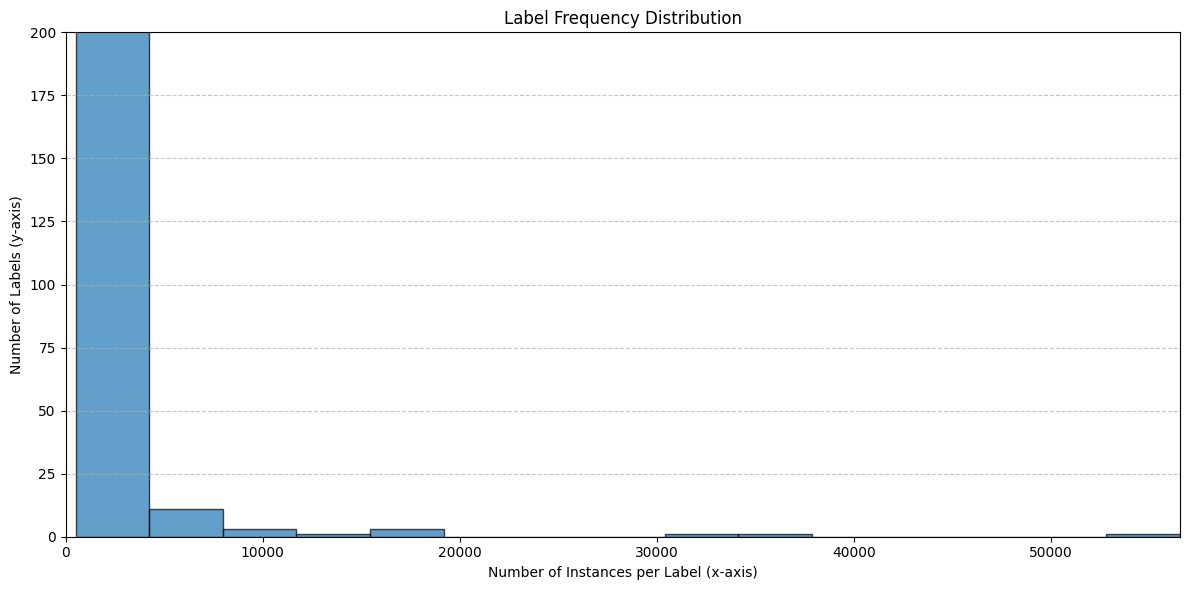

In [5]:
from collections import Counter  # Counter Í∞ùÏ≤¥Î•º collections Î™®ÎìàÏóêÏÑú ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt # Import matplotlib

# Í∞Å ÎùºÎ≤®Ïùò ÎπàÎèÑÏàò Í≥ÑÏÇ∞
label_counts = Counter(combined_df['KDC_NM'])

# ÎùºÎ≤®Ïùò ÎπàÎèÑÏàò (xÏ∂ïÏóê Ìï¥Îãπ)
label_frequencies = list(label_counts.values())

# Ï†ÅÏ†àÌïú bin Í∞úÏàò Í≤∞Ï†ï (ÎπàÎèÑÏàòÏùò Î∂ÑÌè¨Î•º Í∏∞Ï§ÄÏúºÎ°ú)
n_bins = int(np.sqrt(len(label_frequencies)))  # ÎπàÎèÑÏàòÏóê ÎåÄÌï¥ Ï†úÍ≥±Í∑º Î≤ïÏπô Ï†ÅÏö©

# ÎùºÎ≤® ÎπàÎèÑÏàòÎ°ú ÌûàÏä§ÌÜ†Í∑∏Îû® Íµ¨Í∞Ñ ÏÑ§Ï†ï
plt.figure(figsize=(12, 6))

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.hist(
    label_frequencies,  # ÎùºÎ≤® ÎπàÎèÑÏàò ÏÇ¨Ïö©
    bins=n_bins,  # ÎèôÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞Îêú bin Í∞úÏàò
    edgecolor='black',
    alpha=0.7
)

# xÏ∂ï ÏµúÎåÄÍ∞íÏùÑ label_frequenciesÏùò ÏµúÎåìÍ∞íÏúºÎ°ú ÏÑ§Ï†ï
plt.xlim(0, max(label_frequencies))
plt.ylim(0, 200)

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title('Label Frequency Distribution')
plt.xlabel('Number of Instances per Label (x-axis)')
plt.ylabel('Number of Labels (y-axis)')

# xÏ∂ïÏóê ÎùºÎ≤® ÎπàÎèÑÏàò ÌëúÏãú, yÏ∂ïÏóêÎäî Î†àÏù¥Î∏î Í∞úÏàò ÌëúÏãú
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.show()

### Data Augmentation

In [6]:
# !pip install nltk
import nltk
# nltk.download('punkt_tab')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
import random
import pickle
import re

In [7]:
# ÌïúÍ∏ÄÎßå ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄÎäî ÏÇ≠Ï†ú
def get_only_hangul(line):
	parseText= re.compile('/ ^[„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]*$/').sub('',line)

	return parseText

########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################

def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			num_replaced += 1
		if num_replaced >= n:
			break

	if len(new_words) != 0:
		sentence = ' '.join(new_words)
		new_words = sentence.split(" ")

	else:
		new_words = ""

	return new_words

def get_synonyms(word):
	synomyms = []

	try:
		for syn in wordnet[word]:
			for s in syn:
				synomyms.append(s)
	except:
		pass

	return synomyms

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################
def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################
def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################
def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)

	return new_words

def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		if len(new_words) >= 1:
			random_word = new_words[random.randint(0, len(new_words)-1)]
			synonyms = get_synonyms(random_word)
			counter += 1
		else:
			random_word = ""

		if counter >= 10:
			return

	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)

In [8]:
def augment_data(data, label_column, text_column, target_count):
    """
    Args:
        data (pd.DataFrame): ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        label_column (str): ÎùºÎ≤® Ïª¨ÎüºÎ™Ö
        text_column (str): ÌÖçÏä§Ìä∏ Ïª¨ÎüºÎ™Ö
        target_count (int): ÎùºÎ≤®Î≥Ñ ÏµúÏÜå Ïù∏Ïä§ÌÑ¥Ïä§ Ïàò

    Returns:
        pd.DataFrame: Ï¶ùÍ∞ïÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    augmented_data = []
    label_counts = Counter(data[label_column])

    for label, count in label_counts.items():
        label_data = data[data[label_column] == label]
        texts = label_data[text_column].tolist()

        # Ï¶ùÍ∞ï ÎåÄÏÉÅ ÎùºÎ≤® Ï≤òÎ¶¨
        if count < target_count:
            needed = target_count - count

            for _ in range(needed):
                # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïòÎÇò ÏÑ†ÌÉù
                original_text = random.choice(texts)
                original_text = str(original_text)
                words = original_text.split()

                # ÎûúÎç§ÏúºÎ°ú Ï¶ùÍ∞ï Í∏∞Î≤ï ÏÑ†ÌÉù
                augmentation_methods = [
                    lambda w: " ".join(random_deletion(w, p=0.1)),
                    lambda w: " ".join(random_swap(w, n=2)),
                    lambda w: " ".join(random_insertion(w, n=2)),
                    lambda w: " ".join(synonym_replacement(w, n=2))
                ]

                augmented_text = random.choice(augmentation_methods)(words)

                # Ï¶ùÍ∞ïÎêú ÌÖçÏä§Ìä∏ÏôÄ ÎùºÎ≤® Ï†ÄÏû•, ÎÇòÎ®∏ÏßÄ Ïó¥ÏùÄ ÏõêÎ≥∏ÏóêÏÑú Í∞ÄÏ†∏Ïò¥
                augmented_row = {label_column: label, text_column: augmented_text}
                for column in data.columns:
                    if column not in [label_column, text_column]:
                        augmented_row[column] = label_data[column].iloc[0]

                augmented_data.append(augmented_row)

    # Ï¶ùÍ∞ï Îç∞Ïù¥ÌÑ∞ÏôÄ ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
    augmented_df = pd.DataFrame(augmented_data)
    final_data = pd.concat([data, augmented_df], ignore_index=True)
    return final_data

In [9]:
augmented_df = augment_data(combined_df, "KDC_NM", "description", 1000)

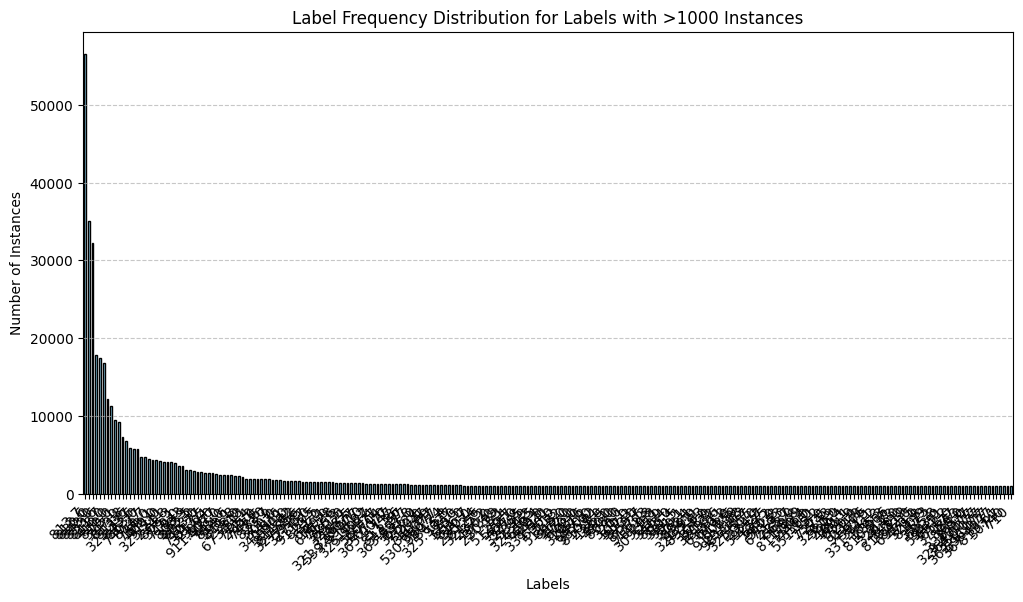

In [10]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
augmented_df['KDC_NM'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Frequency Distribution for Labels with >1000 Instances')
plt.xlabel('Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
augmented_df.shape

(571898, 4)

In [14]:
len(augmented_df['KDC_NM'].value_counts())

248

In [15]:
augmented_df['KDC_NM'].value_counts()

KDC_NM
813.7       56540
813.6       35035
830.0       32274
843.0       17811
833.6       17427
            ...  
367.4077     1000
813.61       1000
307.7        1000
740          1000
710          1000
Name: count, Length: 248, dtype: int64

### Random Under Sampling

In [11]:
from sklearn.utils import resample

def random_undersample(data, label_column, target_count):
    """
    ÏßÄÏ†ïÎêú target_countÎ≥¥Îã§ ÎßéÏùÄ ÎùºÎ≤®Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÎûúÎç§ÌïòÍ≤å Ï§ÑÏù¥Îäî Ìï®Ïàò.

    Args:
        data (pd.DataFrame): ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        label_column (str): ÎùºÎ≤® Ïª¨ÎüºÎ™Ö
        target_count (int): Î™©Ìëú ÎùºÎ≤®Ïùò ÏµúÏÜå Ïù∏Ïä§ÌÑ¥Ïä§ Ïàò

    Returns:
        pd.DataFrame: ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ ÌõÑÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    undersampled_data = []

    # Í∞Å ÎùºÎ≤®Î≥Ñ Ïù∏Ïä§ÌÑ¥Ïä§ Í∞úÏàò ÏÑ∏Í∏∞
    label_counts = data[label_column].value_counts()

    for label, count in label_counts.items():
        label_data = data[data[label_column] == label]

        # ÎùºÎ≤®Ïùò Í∞úÏàòÍ∞Ä target_countÎ≥¥Îã§ ÎßéÏùÑ Í≤ΩÏö∞ ÎûúÎç§ÌïòÍ≤å Ï§ÑÏù¥Í∏∞
        if count > target_count:
            # target_countÎ°ú ÏÉòÌîåÎßÅ
            label_data = resample(label_data,
                                  replace=False,  # ÏÉòÌîåÎßÅÏùÄ Ï§ëÎ≥µ ÏóÜÏù¥
                                  n_samples=target_count,  # ÏßÄÏ†ïÎêú Í∞úÏàòÎßåÌÅº
                                  random_state=42)

        # Ïñ∏ÎçîÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
        undersampled_data.append(label_data)

    # Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•Îêú Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÎ°ú Ìï©Ïπ®
    final_data = pd.concat(undersampled_data, ignore_index=True)

    return final_data

In [12]:
final_df = random_undersample(augmented_df, "KDC_NM", 10000)

In [13]:
final_df.shape

(452540, 4)

In [14]:
final_df.isna().sum()

TITLE_NM            0
ISBN_THIRTEEN_NO    0
KDC_NM              0
description         0
dtype: int64

In [15]:
final_df = final_df.dropna(subset=['description'])

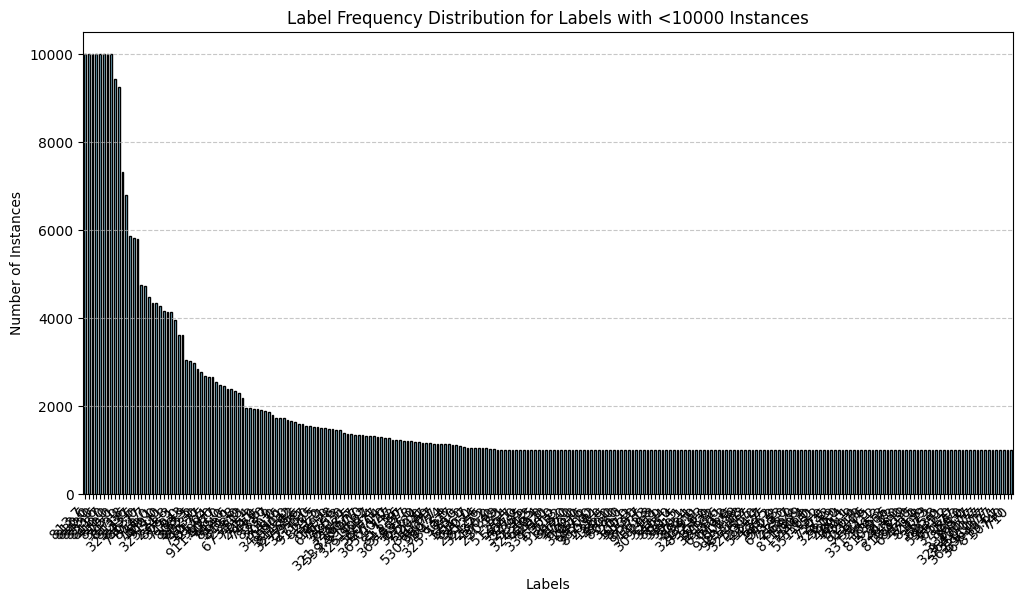

In [16]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
final_df['KDC_NM'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Frequency Distribution for Labels with <10000 Instances')
plt.xlabel('Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
len(final_df['KDC_NM'].unique())

248

## 5000, 1000, 500 Ï≤¥ÌÅ¨

In [ ]:
combined_df['KDC_NM'] = combined_df['KDC_NM'].astype(str).str.strip().str.replace(" ", "", regex=True)
combined_df['KDC_NM'] = combined_df['KDC_NM'].astype(str)

In [ ]:
label_counts = Counter(combined_df['KDC_NM'])
labels_over_5000 = {label for label, count in label_counts.items() if count > 500}

# ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_over5000 = combined_df[combined_df['KDC_NM'].isin(labels_over_5000)].copy()

# Í≤∞Í≥º ÌôïÏù∏
print(df_over5000.shape)
print(df_over5000['KDC_NM'].value_counts())
print(len(df_over5000['KDC_NM'].value_counts()))

(528845, 4)
KDC_NM
813.7    56540
813.6    35036
830.0    32274
843.0    17811
833.6    17427
         ...  
5.11       511
235.7      510
235.0      504
892.8      501
331.1      501
Name: count, Length: 248, dtype: int64
248


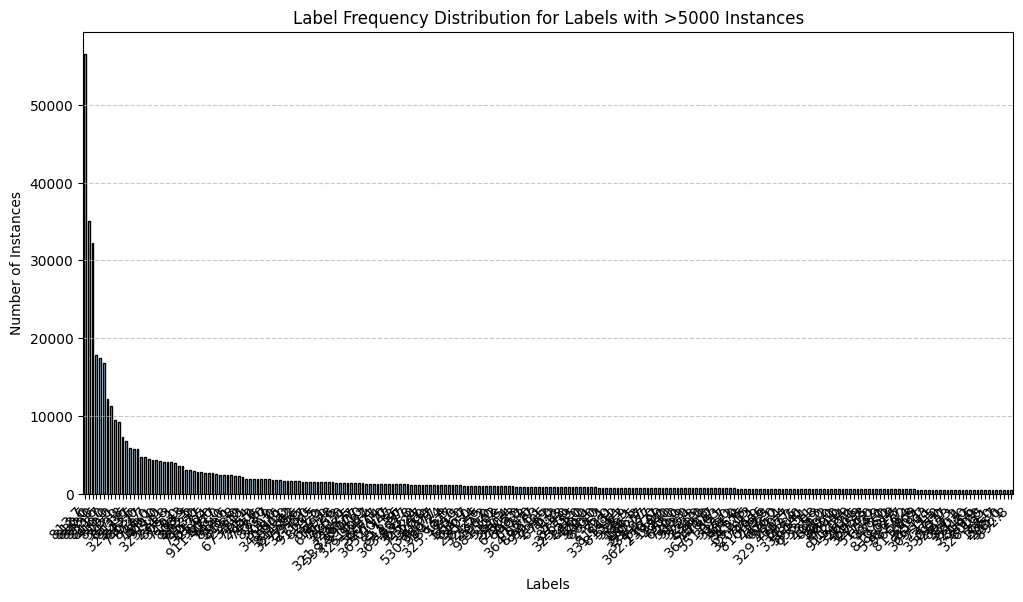

In [ ]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
df_over500['KDC_NM'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Frequency Distribution for Labels with >5000 Instances')
plt.xlabel('Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# KoBERT Model

In [18]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-kmnwoszs/kobert-tokenizer_68839959f99c42509e773a1a9e111d4b
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-kmnwoszs/kobert-tokenizer_68839959f99c42509e773a1a9e111d4b
  Resolved https://github.com/SKTBrain/KoBERT.git to commit fcd729f2f4b37858f333597c0782388ada51eb5f
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4633 sha256=ebf5352b106da241031a3321a7c4d7e6d759d4a52edfaada52b5d9bd9a94c827
  Stored in directory: /tmp/pip-ephem-wheel-cache-pdpuzghw/wheels/b7/95/7c/3f38b039ae9422cc4a51702b37e352d0585442cbe60285f1f2
Successfully built kobert_tokenizer


In [ ]:
# !pip install mxnet
# !pip install gluonnlp pandas tqdm

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.1/49.1 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 344.5/344.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp311-cp311-linux_x86_64.whl size=679483 sha256=726da97a01f2812d1e67852164a11d2a2b6a9e15abf562de100932ad3bd0825a
  Stored in directory: /root/.cache/pip/wheels/29/64/e3/047328bfc4a551696adc4a82dba3c980a1dad62198b8a3bb83
Successfully built gluonnlp


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


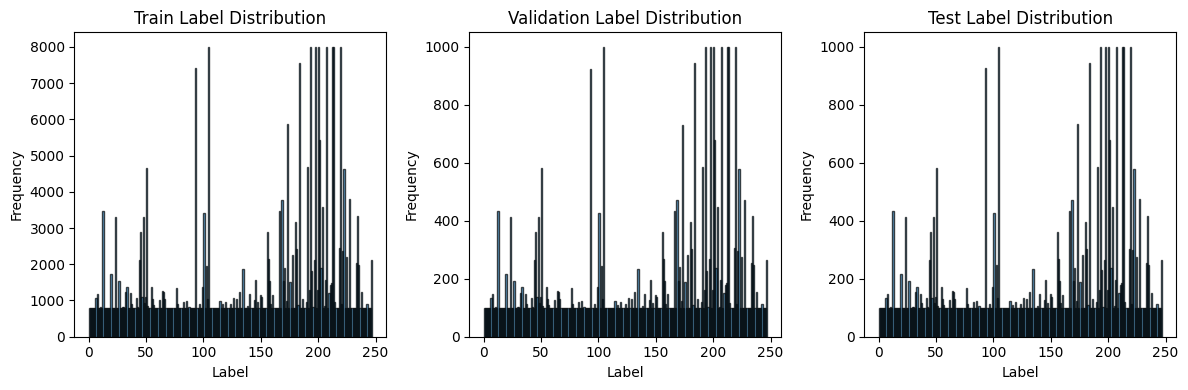

248


In [19]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm, tqdm_notebook
from kobert_tokenizer import KoBERTTokenizer
from torch.utils.data import Dataset, DataLoader, Subset
from transformers import BertTokenizer, BertModel, get_scheduler
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from torch.cuda.amp import GradScaler, autocast

# Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ïÏùò
class BookDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.label_to_index = {label: idx for idx, label in enumerate(sorted(data['KDC_NM'].dropna().astype(str).unique()))}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data.iloc[idx]
        title = item['TITLE_NM']
        description = item['description']
        label = str(item['KDC_NM'])

        label_idx = self.label_to_index[label]

        input_text = title + " " + description
        encoding = self.tokenizer(
            input_text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': label_idx
        }

# Î™®Îç∏ Ï†ïÏùò
class BERTClassifier(nn.Module):
    def __init__(self, bert_model, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = bert_model
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

        for param in self.bert.parameters():
            param.requires_grad = True

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(cls_output)
        return logits

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
MAX_LENGTH = 221
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
EPOCHS = 20
GRAD_ACCUMULATION_STEPS = 4

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
final_df['KDC_NM'] = final_df['KDC_NM'].astype(str)
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
dataset = BookDataset(final_df, tokenizer, MAX_LENGTH)

# Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇòÎàÑÍ∏∞
labels = final_df['KDC_NM'].astype(str).values
indices = list(range(len(final_df)))

train_indices, temp_indices = train_test_split(
    indices, test_size=0.2, stratify=labels, random_state=42
)
val_indices, test_indices = train_test_split(
    temp_indices, test_size=0.5, stratify=[labels[i] for i in temp_indices], random_state=42
)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# DataLoader ÏÉùÏÑ±
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True, prefetch_factor=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True, prefetch_factor=2)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÎùºÎ≤® Ï∂îÏ∂ú
train_labels = [sample['label'] for sample in train_dataset]
val_labels = [sample['label'] for sample in val_dataset]
test_labels = [sample['label'] for sample in test_dataset]

# ÎùºÎ≤® Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))

# Train Îç∞Ïù¥ÌÑ∞ÏÖã ÎùºÎ≤® Î∂ÑÌè¨
plt.subplot(1, 3, 1)
plt.hist(train_labels, bins=np.arange(min(train_labels), max(train_labels)+1, 1), edgecolor='black', alpha=0.7)
plt.title('Train Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Validation Îç∞Ïù¥ÌÑ∞ÏÖã ÎùºÎ≤® Î∂ÑÌè¨
plt.subplot(1, 3, 2)
plt.hist(val_labels, bins=np.arange(min(val_labels), max(val_labels)+1, 1), edgecolor='black', alpha=0.7)
plt.title('Validation Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Test Îç∞Ïù¥ÌÑ∞ÏÖã ÎùºÎ≤® Î∂ÑÌè¨
plt.subplot(1, 3, 3)
plt.hist(test_labels, bins=np.arange(min(test_labels), max(test_labels)+1, 1), edgecolor='black', alpha=0.7)
plt.title('Test Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î†àÏù¥Î∏îÎ≥Ñ ÏÉòÌîå Í∞úÏàò Í≥ÑÏÇ∞
from collections import Counter

# Extract labels from the dataset's data attribute
labels = dataset.data['KDC_NM'].astype(str).tolist()
label_counts = Counter([dataset.label_to_index[label] for label in labels])

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞: Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò / (ÌÅ¥ÎûòÏä§ Ïàò * Ìï¥Îãπ ÌÅ¥ÎûòÏä§ ÏÉòÌîå Ïàò)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(dataset.label_to_index)  # Replace with your model's actual number of output classes
total_samples = sum(label_counts.values())
print(num_classes)

# Í∞ÄÏ§ëÏπò Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
class_weights = [total_samples / (num_classes * label_counts.get(i, 1)) for i in range(num_classes)]

# Í∞ÄÏ§ëÏπòÎ•º ÌÖêÏÑúÎ°ú Î≥ÄÌôò
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

In [ ]:
# 'KDC_NM' Ïó¥ÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
final_df['KDC_NM'] = final_df['KDC_NM'].astype(str)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≥†Ïú† ÎùºÎ≤® ÌôïÏù∏
unique_labels = final_df['KDC_NM'].unique()
print(f"Îç∞Ïù¥ÌÑ∞ÏÖã Í≥†Ïú† ÎùºÎ≤® Í∞úÏàò: {len(unique_labels)}")

# Îß§Ìïë ÌÖåÏù¥Î∏î ÌôïÏù∏
print(f"Îß§Ìïë ÌÖåÏù¥Î∏î ÌÅ¨Í∏∞: {len(dataset.label_to_index)}")  # 18141 Ï∂úÎ†• ÏòàÏÉÅ

# Îß§Ìïë ÌÖåÏù¥Î∏îÏóê Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≥†Ïú† ÎùºÎ≤®Ïù¥ Î™®Îëê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏
missing_labels = [label for label in unique_labels if label not in dataset.label_to_index]
if missing_labels:
    print(f"Îß§ÌïëÎêòÏßÄ ÏïäÏùÄ ÎùºÎ≤®: {missing_labels}")
else:
    print("Î™®Îì† ÎùºÎ≤®Ïù¥ Îß§ÌïëÎêòÏóàÏäµÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ÏÖã Í≥†Ïú† ÎùºÎ≤® Í∞úÏàò: 248
Îß§Ìïë ÌÖåÏù¥Î∏î ÌÅ¨Í∏∞: 248
Î™®Îì† ÎùºÎ≤®Ïù¥ Îß§ÌïëÎêòÏóàÏäµÎãàÎã§.


## 5000Í∞ú Ïù¥ÏÉÅ



In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import numpy as np

# Î™®Îç∏ Ï§ÄÎπÑ
bert_model = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=True)
model = BERTClassifier(bert_model, len(dataset.label_to_index))
model.to(device)

# ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞è Ïä§ÏºÄÏ§ÑÎü¨
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * EPOCHS)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
scaler = GradScaler()

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_accuracy(logits, labels):
    preds = torch.argmax(logits, dim=1)
    correct = (preds == labels).sum().item()
    return correct / len(labels)

# Early Stopping ÏÑ§Ï†ï
best_val_loss = float('inf')
patience = 3  # ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏóÜÎäî epoch Ïàò
patience_counter = 0

# Î™®Îç∏ Ï†ÄÏû• Í≤ΩÎ°ú
best_model_path = "best_model.pth"

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Í∏∞Î°ùÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Î£®ÌîÑ
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    total_acc = 0

    for i, batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch + 1}/{EPOCHS} [Training]")):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        with autocast():
            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels) / GRAD_ACCUMULATION_STEPS

        scaler.scale(loss).backward()

        if (i + 1) % GRAD_ACCUMULATION_STEPS == 0 or (i + 1) == len(train_loader):
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            optimizer.zero_grad()

        total_loss += loss.item() * GRAD_ACCUMULATION_STEPS
        total_acc += calculate_accuracy(logits, labels)

    avg_train_loss = total_loss / len(train_loader)
    avg_train_acc = total_acc / len(train_loader)

    # Í≤ÄÏ¶ù Î£®ÌîÑ
    model.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{EPOCHS} [Validation]"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            with autocast():
                logits = model(input_ids, attention_mask)
                loss = criterion(logits, labels)

            val_loss += loss.item()
            val_acc += calculate_accuracy(logits, labels)

    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc = val_acc / len(val_loader)

    # ÌïôÏäµ/Í≤ÄÏ¶ù ÏÜêÏã§ Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.4f}")
    print(f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_acc:.4f}")

    # Early Stopping Ï≤¥ÌÅ¨
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0  # ÏÑ±Îä• Ìñ•ÏÉÅ Ïãú Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
        torch.save(model.state_dict(), best_model_path)  # Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ Ï†ÄÏû•
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation loss.")
        break

    # Î¶¨Ïä§Ìä∏Ïóê Í∞í Ï†ÄÏû•
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ, Í∞ÄÏû• Ïûò ÎÇòÏò® Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model.load_state_dict(torch.load(best_model_path))

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú F1, Recall, ROC AUC Í≥ÑÏÇ∞
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)

        # ÏòàÏ∏°Í∞í Ï†ÄÏû•
        preds = torch.argmax(logits, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

        # ÌôïÎ•†Í∞í Ï†ÄÏû• (softmax)
        probabilities = F.softmax(logits, dim=1)  # Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•†
        test_probabilities.extend(probabilities.cpu().numpy())

# F1 Score, Recall, ROC AUC Í≥ÑÏÇ∞ (ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(test_labels, test_preds, average="micro")
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(test_labels, test_preds, average="macro")

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• Ï∂úÎ†•
print(f"\nTest Set Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Micro: {f1_micro:.4f}, F1 Macro: {f1_macro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}, Recall Macro: {recall_macro:.4f}, ROC AUC: {roc_auc:.4f}")

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(15, 7))

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss", marker='o')
plt.plot(epochs_range, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()

# Accuracy Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

/tmp/ipython-input-18-716834336.py:13: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Epoch 1/20 [Training]:   0%|          | 0/11314 [00:00<?, ?it/s]/tmp/ipython-input-18-716834336.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/20 [Validation]:   0%|          | 0/1415 [00:00<?, ?it/s]/tmp/ipython-input-18-716834336.py:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.95it/s]


Epoch 1/20
Train Loss: 3.0957, Train Accuracy: 0.4443
Val Loss: 1.6864, Val Accuracy: 0.5913


Epoch 2/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.88it/s]


Epoch 2/20
Train Loss: 1.4593, Train Accuracy: 0.5932
Val Loss: 1.1702, Val Accuracy: 0.6199


Epoch 3/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 62.91it/s]


Epoch 3/20
Train Loss: 1.1177, Train Accuracy: 0.6276
Val Loss: 1.0491, Val Accuracy: 0.6332


Epoch 4/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.86it/s]


Epoch 4/20
Train Loss: 0.9765, Train Accuracy: 0.6486
Val Loss: 0.9616, Val Accuracy: 0.6649


Epoch 5/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 62.56it/s]


Epoch 5/20
Train Loss: 0.8900, Train Accuracy: 0.6650
Val Loss: 0.9301, Val Accuracy: 0.6439


Epoch 6/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.90it/s]


Epoch 6/20
Train Loss: 0.8252, Train Accuracy: 0.6795
Val Loss: 0.8868, Val Accuracy: 0.6624


Epoch 7/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.97it/s]


Epoch 7/20
Train Loss: 0.7691, Train Accuracy: 0.6940
Val Loss: 0.8658, Val Accuracy: 0.6817


Epoch 8/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 62.83it/s]


Epoch 8/20
Train Loss: 0.7221, Train Accuracy: 0.7030
Val Loss: 0.8445, Val Accuracy: 0.6773


Epoch 9/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.79it/s]


Epoch 9/20
Train Loss: 0.6806, Train Accuracy: 0.7160
Val Loss: 0.8305, Val Accuracy: 0.6889


Epoch 10/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 64.12it/s]


Epoch 10/20
Train Loss: 0.6435, Train Accuracy: 0.7254
Val Loss: 0.8256, Val Accuracy: 0.6927


Epoch 11/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 62.21it/s]


Epoch 11/20
Train Loss: 0.6062, Train Accuracy: 0.7351
Val Loss: 0.8158, Val Accuracy: 0.7057


Epoch 12/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:21<00:00, 64.96it/s]


Epoch 12/20
Train Loss: 0.5739, Train Accuracy: 0.7454
Val Loss: 0.8069, Val Accuracy: 0.7086


Epoch 13/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.07it/s]


Epoch 13/20
Train Loss: 0.5447, Train Accuracy: 0.7553
Val Loss: 0.8132, Val Accuracy: 0.7125


Epoch 14/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.34it/s]


Epoch 14/20
Train Loss: 0.5165, Train Accuracy: 0.7609
Val Loss: 0.8096, Val Accuracy: 0.7186


Epoch 15/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.76it/s]


Epoch 15/20
Train Loss: 0.4896, Train Accuracy: 0.7688
Val Loss: 0.8066, Val Accuracy: 0.7211


Epoch 16/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:21<00:00, 64.54it/s]


Epoch 16/20
Train Loss: 0.4657, Train Accuracy: 0.7780
Val Loss: 0.8132, Val Accuracy: 0.7159


Epoch 17/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 64.00it/s]


Epoch 17/20
Train Loss: 0.4433, Train Accuracy: 0.7834
Val Loss: 0.8276, Val Accuracy: 0.7223


Epoch 18/20 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [00:22<00:00, 63.48it/s]


Epoch 18/20
Train Loss: 0.4189, Train Accuracy: 0.7905
Val Loss: 0.8146, Val Accuracy: 0.7233
Early stopping at epoch 18 due to no improvement in validation loss.


Testing:   0%|          | 0/1415 [00:00<?, ?it/s]


NameError: name 'test_probabilities' is not defined

In [21]:
from transformers import BertModel
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import torch.nn.functional as F
import torch

# üîπ 1. Î™®Îç∏ Ï¥àÍ∏∞Ìôî Î∞è best_model.pth Î∂àÎü¨Ïò§Í∏∞
bert_model = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=True)
model = BERTClassifier(bert_model, len(dataset.label_to_index))
model.load_state_dict(torch.load("best_model.pth"))
model.to(device)
model.eval()

# üîπ 2. ÌÖåÏä§Ìä∏ÏÖãÏóêÏÑú ÏòàÏ∏°Í∞í, Ïã§Ï†úÍ∞í, softmax ÌôïÎ•† ÏàòÏßë
test_preds = []
test_labels = []
test_probabilities = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)

        preds = torch.argmax(logits, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

        probabilities = F.softmax(logits, dim=1)
        test_probabilities.extend(probabilities.cpu().numpy())

# üîπ 3. Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
test_accuracy = accuracy_score(test_labels, test_preds)

# üîπ 4. Precision, Recall, F1
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(test_labels, test_preds, average="micro")
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(test_labels, test_preds, average="macro")

# üîπ 5. ROC AUC Í≥ÑÏÇ∞
num_classes = len(dataset.label_to_index)
test_labels_onehot = label_binarize(test_labels, classes=list(range(num_classes)))
roc_auc = roc_auc_score(test_labels_onehot, test_probabilities, average="macro", multi_class="ovr")

# üîπ 6. Ï∂úÎ†•
print(f"\nüîπ Test Set Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Micro: {f1_micro:.4f}, F1 Macro: {f1_macro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}, Recall Macro: {recall_macro:.4f}")
print(f"ROC AUC (macro): {roc_auc:.4f}")

config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

Testing: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [01:52<00:00, 12.53it/s]



üîπ Test Set Performance:
Accuracy: 0.7227
F1 Micro: 0.7227, F1 Macro: 0.7677
Recall Micro: 0.7227, Recall Macro: 0.7930
ROC AUC (macro): 0.9953


In [24]:
from sklearn.metrics import accuracy_score

# Ïà´Ïûê ‚Üí Î¨∏ÏûêÏó¥ ÎùºÎ≤® Î≥ÄÌôò
index_to_label = {v: k for k, v in dataset.label_to_index.items()}
test_labels_str = [index_to_label[i] for i in test_labels]
test_preds_str = [index_to_label[i] for i in test_preds]

# ‚úÖ level1~3ÏùÄ Ìï≠ÏÉÅ Ï°¥Ïû¨, level4Îäî Ï°∞Í±¥Î∂ÄÎ°ú Í≥ÑÏÇ∞
def parse_kdc_levels(kdc_codes):
    level1, level2, level3, level4 = [], [], [], []
    has_decimal = []  # ÏÜåÏàòÏ†ê ÏûàÎäîÏßÄ Ïó¨Î∂Ä
    for code in kdc_codes:
        main = code.split(".")[0].zfill(3)
        decimal_part = code.split(".")[1] if "." in code else None

        level1.append(main[0])
        level2.append(main[1])
        level3.append(main[2])

        if decimal_part is not None and len(decimal_part) > 0:
            level4.append(decimal_part[0])
            has_decimal.append(True)
        else:
            level4.append(None)  # placeholder
            has_decimal.append(False)

    return level1, level2, level3, level4, has_decimal

# Î†àÎ≤®Î≥Ñ Î∂ÑÎ¶¨
true_level1, true_level2, true_level3, true_level4, true_mask = parse_kdc_levels(test_labels_str)
pred_level1, pred_level2, pred_level3, pred_level4, pred_mask = parse_kdc_levels(test_preds_str)

# Accuracy Í≥ÑÏÇ∞ (level 1~3)
acc1 = accuracy_score(true_level1, pred_level1)
acc2 = accuracy_score(true_level2, pred_level2)
acc3 = accuracy_score(true_level3, pred_level3)

# ‚úÖ level4Îäî ÏÜåÏàòÏ†ê ÏûàÎäî ÏÉòÌîåÎßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú Í≥ÑÏÇ∞
valid_indices = [i for i, has_dec in enumerate(true_mask) if has_dec]

filtered_true_level4 = [true_level4[i] for i in valid_indices]
filtered_pred_level4 = [pred_level4[i] for i in valid_indices]

# ‚úÖ level4Îäî trueÏôÄ pred Îëò Îã§ ÏÜåÏàòÏ†ê ÏûàÎäî ÏÉòÌîåÎßå ÌïÑÌÑ∞ÎßÅ
valid_indices = [
    i for i in range(len(true_level4))
    if true_level4[i] is not None and pred_level4[i] is not None
]

filtered_true_level4 = [true_level4[i] for i in valid_indices]
filtered_pred_level4 = [pred_level4[i] for i in valid_indices]

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
acc4 = accuracy_score(filtered_true_level4, filtered_pred_level4)

# Ï†ÑÏ≤¥ ÏΩîÎìú Ï†ïÌôïÎèÑ
acc_full = accuracy_score(test_labels_str, test_preds_str)

# Ï∂úÎ†•
print(f"‚úÖ Level 1 Accuracy: {acc1:.4f}")
print(f"‚úÖ Level 2 Accuracy: {acc2:.4f}")
print(f"‚úÖ Level 3 Accuracy: {acc3:.4f}")
print(f"‚úÖ Level 4 Accuracy (only when decimal exists): {acc4:.4f}")
print(f"‚úÖ Full KDC Code Match Accuracy: {acc_full:.4f}")

‚úÖ Level 1 Accuracy: 0.9247
‚úÖ Level 2 Accuracy: 0.8879
‚úÖ Level 3 Accuracy: 0.8491
‚úÖ Level 4 Accuracy (only when decimal exists): 0.8169
‚úÖ Full KDC Code Match Accuracy: 0.7227


In [25]:
from sklearn.metrics import accuracy_score

# Ïà´Ïûê ‚Üí Î¨∏ÏûêÏó¥ ÎùºÎ≤® Î≥ÄÌôò
index_to_label = {v: k for k, v in dataset.label_to_index.items()}
test_labels_str = [index_to_label[i] for i in test_labels]
test_preds_str = [index_to_label[i] for i in test_preds]

# ‚úÖ level1~3 + ÏÜåÏàòÏ†ê Îí∑ÏûêÎ¶¨ ÏµúÎåÄ 6ÏûêÎ¶¨ÍπåÏßÄ Î∂ÑÌï¥
def parse_kdc_levels(kdc_codes):
    level1, level2, level3 = [], [], []
    level4, level5, level6, level7, level8, level9 = [], [], [], [], [], []

    for code in kdc_codes:
        main = code.split(".")[0].zfill(3)
        decimal = code.split(".")[1] if "." in code else ""

        level1.append(main[0])
        level2.append(main[1])
        level3.append(main[2])
        level4.append(decimal[0] if len(decimal) > 0 else None)
        level5.append(decimal[1] if len(decimal) > 1 else None)
        level6.append(decimal[2] if len(decimal) > 2 else None)
        level7.append(decimal[3] if len(decimal) > 3 else None)
        level8.append(decimal[4] if len(decimal) > 4 else None)
        level9.append(decimal[5] if len(decimal) > 5 else None)

    return [level1, level2, level3, level4, level5, level6, level7, level8, level9]

# Î†àÎ≤®Î≥Ñ Î∂ÑÎ¶¨
true_levels = parse_kdc_levels(test_labels_str)
pred_levels = parse_kdc_levels(test_preds_str)

# ‚úÖ level 1~3: Ï†ÑÏ≤¥Ïóê ÎåÄÌï¥ Í≥ÑÏÇ∞ Í∞ÄÎä•
accs = []
for i in range(3):
    acc = accuracy_score(true_levels[i], pred_levels[i])
    accs.append(acc)
    print(f"‚úÖ Level {i+1} Accuracy: {acc:.4f}")

# ‚úÖ level 4~9: NoneÏù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú Í≥ÑÏÇ∞
for i in range(3, 9):
    valid_indices = [
        j for j in range(len(true_levels[i]))
        if true_levels[i][j] is not None and pred_levels[i][j] is not None
    ]
    filtered_true = [true_levels[i][j] for j in valid_indices]
    filtered_pred = [pred_levels[i][j] for j in valid_indices]

    if len(filtered_true) > 0:
        acc = accuracy_score(filtered_true, filtered_pred)
        accs.append(acc)
        print(f"‚úÖ Level {i+1} Accuracy (decimal {i-2} digit): {acc:.4f}")
    else:
        print(f"‚ö†Ô∏è Level {i+1} Accuracy: Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")

# ‚úÖ Ï†ÑÏ≤¥ ÏùºÏπòÏú® (Î¨∏ÏûêÏó¥ Í∏∞Î∞ò)
acc_full = accuracy_score(test_labels_str, test_preds_str)
print(f"‚úÖ Full KDC Code Match Accuracy: {acc_full:.4f}")


‚úÖ Level 1 Accuracy: 0.9247
‚úÖ Level 2 Accuracy: 0.8879
‚úÖ Level 3 Accuracy: 0.8491
‚úÖ Level 4 Accuracy (decimal 1 digit): 0.8169
‚úÖ Level 5 Accuracy (decimal 2 digit): 0.9517
‚úÖ Level 6 Accuracy (decimal 3 digit): 0.9896
‚úÖ Level 7 Accuracy (decimal 4 digit): 0.9974
‚úÖ Level 8 Accuracy (decimal 5 digit): 1.0000
‚úÖ Level 9 Accuracy (decimal 6 digit): 1.0000
‚úÖ Full KDC Code Match Accuracy: 0.7227


In [34]:
# ÏÜåÏàòÏ†ê Îí∑ÏûêÎ¶¨Í∞Ä Í∞ÄÏû• Í∏¥ ÎùºÎ≤® Ï∞æÍ∏∞
max_decimal_len = 0
longest_labels = []

for label in test_labels_str:
    if "." in label:
        decimal_part = label.split(".")[1]
        if len(decimal_part) > max_decimal_len:
            max_decimal_len = len(decimal_part)
            longest_labels = [label]
        elif len(decimal_part) == max_decimal_len:
            longest_labels.append(label)

print(f"üìè ÏÜåÏàòÏ†ê Îí∑ÏûêÎ¶¨Í∞Ä Í∞ÄÏû• Í∏¥ Í∏∏Ïù¥: {max_decimal_len}")
print(f"üîé Ìï¥ÎãπÌïòÎäî ÎùºÎ≤®Îì§ ÏòàÏãú: {longest_labels[:10]}")
print(f"Ï¥ù {len(longest_labels)}Í∞ú")


üìè ÏÜåÏàòÏ†ê Îí∑ÏûêÎ¶¨Í∞Ä Í∞ÄÏû• Í∏¥ Í∏∏Ïù¥: 6
üîé Ìï¥ÎãπÌïòÎäî ÎùºÎ≤®Îì§ ÏòàÏãú: ['321.329077', '321.329077', '321.329077', '321.329077', '321.329077', '321.329077', '321.329077', '321.329077', '321.329077', '321.329077']
Ï¥ù 135Í∞ú


In [35]:
# ÏÜåÏàòÏ†ê Îí∑ÏûêÎ¶¨Í∞Ä Ï†ïÌôïÌûà Í∏∏Ïù¥ 6Ïù∏ ÎùºÎ≤® Í∞úÏàò ÏÑ∏Í∏∞
count_len_6 = sum(
    1 for label in test_labels_str
    if "." in label and len(label.split(".")[1]) == 6
)

print(f"üìå ÏÜåÏàòÏ†ê Îí∑ÏûêÎ¶¨Í∞Ä Ï†ïÌôïÌûà 6ÏûêÎ¶¨Ïù∏ ÎùºÎ≤® Ïàò: {count_len_6}")

üìå ÏÜåÏàòÏ†ê Îí∑ÏûêÎ¶¨Í∞Ä Ï†ïÌôïÌûà 6ÏûêÎ¶¨Ïù∏ ÎùºÎ≤® Ïàò: 135


/tmp/ipython-input-29-2726518144.py:45: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-29-2726518144.py:45: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


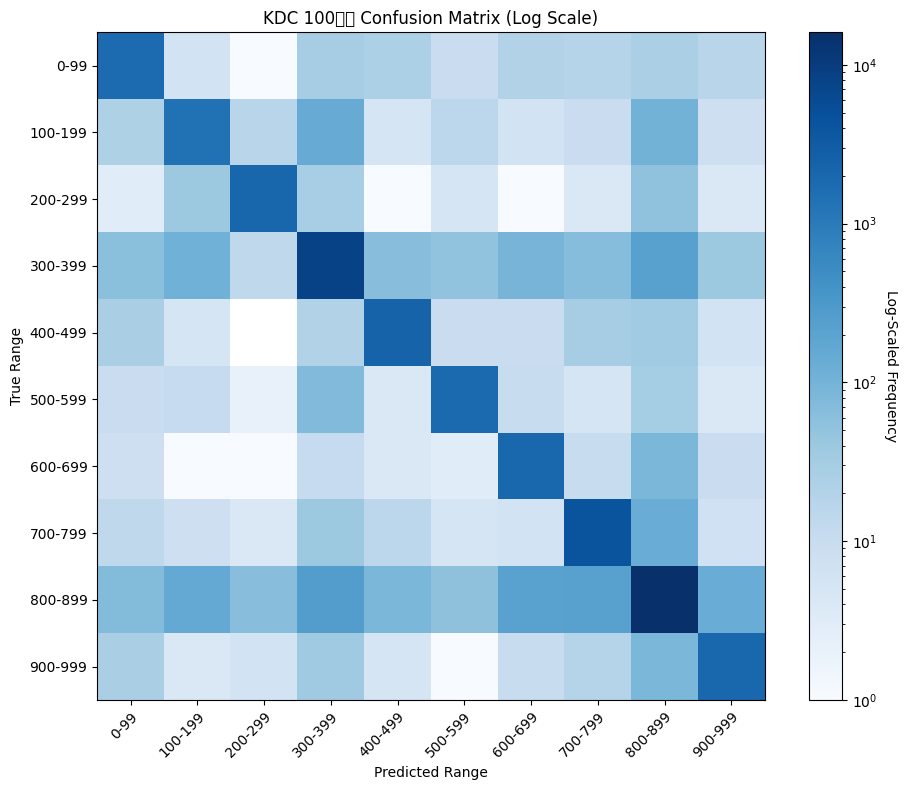

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LogNorm

# Î¨∏ÏûêÏó¥ ÎùºÎ≤®Î°ú Î≥ÄÌôò
test_labels_str = [index_to_label[i] for i in test_labels]
test_preds_str = [index_to_label[i] for i in test_preds]

# main classÎßå Ï∂îÏ∂ú: Ï†ïÏàòÌôî ÌõÑ 100 Îã®ÏúÑ Í∑∏Î£πÌôî
def extract_main_class_group(label):
    main = int(label.split(".")[0])
    return (main // 100) * 100

# Í∑∏Î£πÌôîÎêú ÎùºÎ≤® Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
grouped_true = [extract_main_class_group(lab) for lab in test_labels_str]
grouped_pred = [extract_main_class_group(lab) for lab in test_preds_str]

# Í≥†Ïú† Í∑∏Î£π Ï†ïÎ†¨
unique_groups = sorted(set(grouped_true + grouped_pred))
conf_matrix = confusion_matrix(grouped_true, grouped_pred, labels=unique_groups)

# display labels
display_labels = [f"{g}-{g+99}" for g in unique_groups]

# ÏãúÍ∞ÅÌôî - imshow ÏßÅÏ†ë ÏÇ¨Ïö©
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues, norm=LogNorm(vmin=1, vmax=conf_matrix.max()))

# Ïª¨Îü¨Î∞î
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Log-Scaled Frequency", rotation=270, labelpad=15)

# ÎùºÎ≤® ÏÑ§Ï†ï
ax.set(
    xticks=range(len(display_labels)),
    yticks=range(len(display_labels)),
    xticklabels=display_labels,
    yticklabels=display_labels,
    xlabel="Predicted Range",
    ylabel="True Range",
    title="KDC 100Îã®ÏúÑ Confusion Matrix (Log Scale)"
)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.grid(False)
plt.tight_layout()
plt.show()


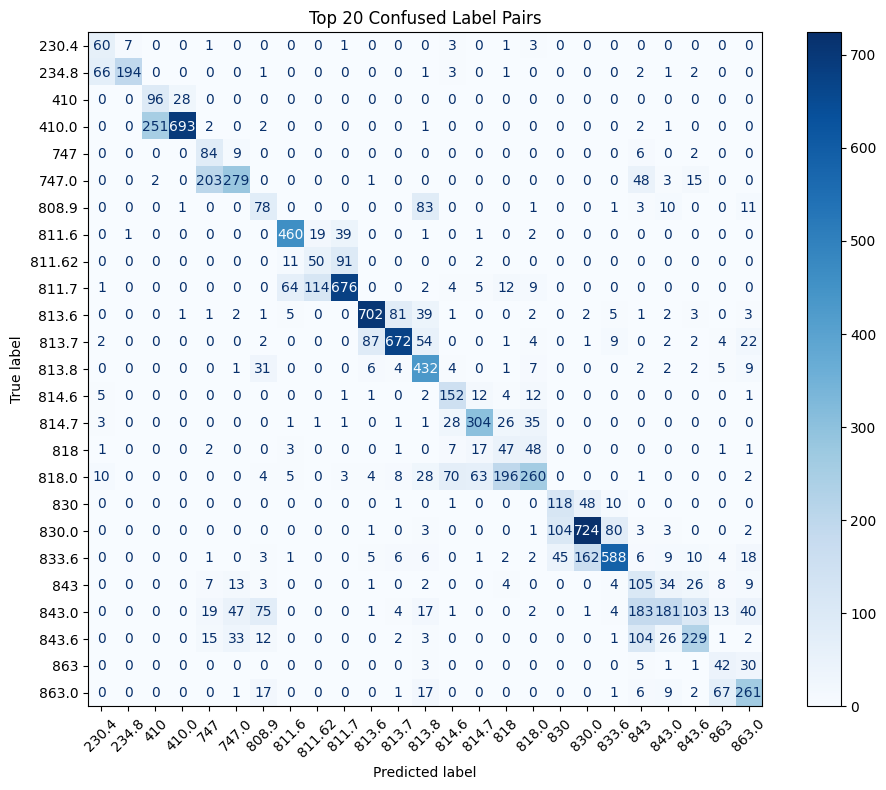

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Î¨∏ÏûêÏó¥ ÎùºÎ≤® Ï§ÄÎπÑ
labels = test_labels_str
preds  = test_preds_str

# 2) Í≥†Ïú† ÎùºÎ≤® ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
unique_labels = sorted(set(labels))
# (Ïù¥ Î¶¨Ïä§Ìä∏Í∞Ä confusion_matrix Ìñâ¬∑Ïó¥ ÏàúÏÑúÏôÄ 1:1 Îß§ÌïëÎê©ÎãàÎã§)

# 3) ÌòºÎèô ÌñâÎ†¨ + error matrix
cm          = confusion_matrix(labels, preds, labels=unique_labels)
error_mtx   = cm.copy()
np.fill_diagonal(error_mtx, 0)

# 4) ÏÉÅÏúÑ 20Í∞ú Ïò§Î∂ÑÎ•ò Ïù∏Îç±Ïä§ (Í∞ÄÏû• ÌÅ∞ Í∞íÎ∂ÄÌÑ∞)
flat_idxs = np.argsort(error_mtx.flatten())[::-1]  # ÎÇ¥Î¶ºÏ∞®Ïàú
top_idxs  = flat_idxs[:20]
pairs     = [np.unravel_index(idx, error_mtx.shape) for idx in top_idxs]

# 5) ÎùºÎ≤® ÏåçÏúºÎ°ú Î≥ÄÌôò
top_pairs = [(unique_labels[i], unique_labels[j]) for i,j in pairs]

# 6) Ìè¨Ìï®Îêú ÎùºÎ≤® Î™®ÏïÑÏÑú Î∂ÄÎ∂Ñ confusion matrix
labels_of_interest = sorted({t for t,p in top_pairs} | {p for t,p in top_pairs})
sub_cm = confusion_matrix(labels, preds, labels=labels_of_interest)

# 7) ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10,8))
disp = ConfusionMatrixDisplay(sub_cm, display_labels=labels_of_interest)
disp.plot(cmap=plt.cm.Blues, include_values=True, ax=ax, xticks_rotation=45)
plt.title("Top 20 Confused Label Pairs")
plt.tight_layout()
plt.show()


In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix

# ‚úÖ confusion matrix Í≥ÑÏÇ∞
conf_matrix = confusion_matrix(test_labels, test_preds)

# ‚úÖ ÎåÄÍ∞ÅÏÑ† Ï†úÍ±∞ (Ï†ïÌôïÌïú ÏòàÏ∏° Ï†úÍ±∞)
error_matrix = conf_matrix.copy()
np.fill_diagonal(error_matrix, 0)

# ‚úÖ Í∞ÄÏû• ÌÅ∞ Ïò§Ï∞® 10Í∞ú Ï∞æÍ∏∞
top_misclassifications = np.unravel_index(
    np.argsort(error_matrix, axis=None)[-20:], error_matrix.shape
)

# ‚úÖ ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ Ï†ïÏùò (Ï†ïÏàòÎùºÎ©¥ Í∑∏ÎÉ• Ïà´Ïûê, Î¨∏ÏûêÏó¥Ïù¥ÎùºÎ©¥ Î≥ÄÌôò)
# Ïòà: class_names = [index_to_label[i] for i in sorted(set(test_labels))]
class_names = sorted(set(test_labels))  # ÎòêÎäî test_labels_str Í∏∞Î∞ò Ï≤òÎ¶¨ Í∞ÄÎä•

# ‚úÖ ÏÉÅÏúÑ Ïò§Î∂ÑÎ•ò ÌÅ¥ÎûòÏä§Ïåç Ï∂úÎ†•
print("üîç Top 10 Most Confused Class Pairs:")
for true_class, pred_class in zip(*top_misclassifications[::-1]):
    count = error_matrix[true_class, pred_class]
    if count > 0:
        print(f"True: {class_names[true_class]}, Pred: {class_names[pred_class]}, Count: {count}")


üîç Top 10 Most Confused Class Pairs:
True: 203, Pred: 207, Count: 35
True: 190, Pred: 193, Count: 39
True: 16, Pred: 23, Count: 7
True: 226, Pred: 227, Count: 30
True: 202, Pred: 207, Count: 12
True: 181, Pred: 219, Count: 10
True: 213, Pred: 212, Count: 162
True: 200, Pred: 197, Count: 87
True: 201, Pred: 181, Count: 31
True: 197, Pred: 200, Count: 81
True: 193, Pred: 192, Count: 114
True: 222, Pred: 219, Count: 26
True: 218, Pred: 222, Count: 26
True: 211, Pred: 212, Count: 48
True: 192, Pred: 193, Count: 91
True: 212, Pred: 213, Count: 80
True: 218, Pred: 219, Count: 34
True: 206, Pred: 207, Count: 48
True: 172, Pred: 173, Count: 9
True: 103, Pred: 104, Count: 28


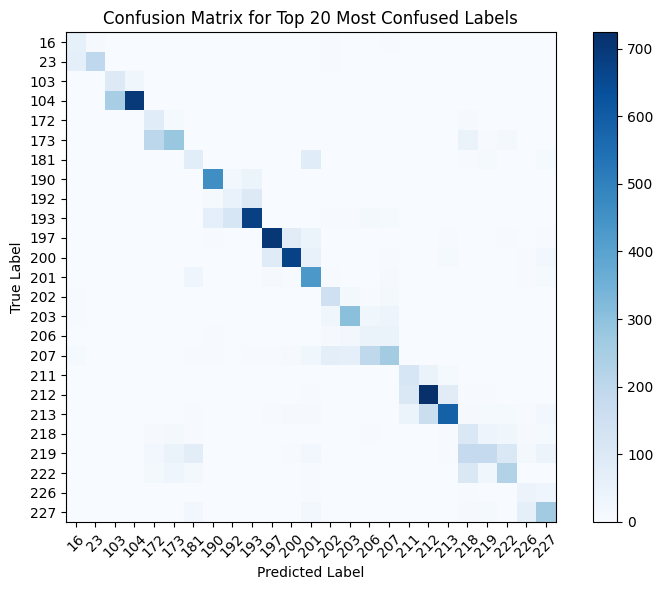

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# (1) Ïù¥ÎØ∏ Íµ¨Ìï¥ÎÜìÏùÄ error_matrix ÏôÄ class_names, test_labels, test_preds Í∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ï
#     Í∑∏Î¶¨Í≥† flat_idxs, top_idxs, row_idx, col_idx ÍπåÏßÄ Í≥ÑÏÇ∞Îêú ÏÉÅÌÉúÏó¨Ïïº Ìï©ÎãàÎã§.

# ÏòàÏãúÎ°ú Îã§Ïãú Í≥ÑÏÇ∞Ìï¥Î≥¥Î©¥:
conf_matrix = confusion_matrix(test_labels, test_preds)
error_matrix = conf_matrix.copy()
np.fill_diagonal(error_matrix, 0)
flat_idxs = np.argsort(error_matrix.flatten())[::-1]
top_k = 20
top_idxs = flat_idxs[:top_k]
row_idx, col_idx = np.unravel_index(top_idxs, error_matrix.shape)

# (2) Í¥ÄÏã¨ ÏûàÎäî ÎùºÎ≤® Ïù∏Îç±Ïä§ ÏßëÌï© ÏÉùÏÑ±
labels_of_interest_idx = sorted(set(row_idx.tolist() + col_idx.tolist()))

# (3) Ïù∏Îç±Ïä§Î•º Ïã§Ï†ú Î¨∏ÏûêÏó¥ ÎùºÎ≤®Î°ú Îß§Ìïë
#     class_names[i] Í∞Ä iÎ≤à Ïù∏Îç±Ïä§Ïùò Î¨∏ÏûêÏó¥ ÎùºÎ≤®Ïù¥ÎùºÍ≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
display_labels = [class_names[i] for i in labels_of_interest_idx]

# (4) Î∂ÄÎ∂Ñ confusion matrix Í≥ÑÏÇ∞ (Ï†ïÏàò Ïù∏Îç±Ïä§ Í∏∞Ï§Ä)
sub_cm = confusion_matrix(
    test_labels,
    test_preds,
    labels=labels_of_interest_idx
)

# (5) ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=sub_cm, display_labels=display_labels)
disp.plot(
    cmap=plt.cm.Blues,
    include_values=False,
    xticks_rotation=45,
    ax=ax
)
plt.title("Confusion Matrix for Top 20 Most Confused Labels")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


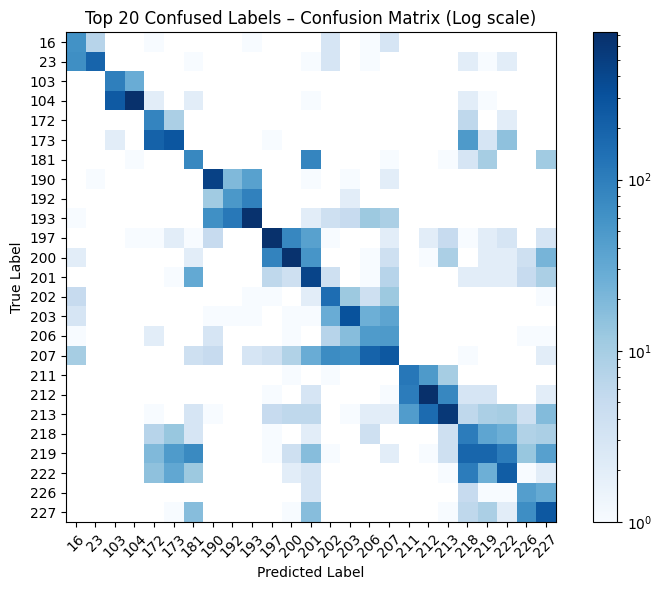

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import LogNorm

# 1) Ï†ÑÏ≤¥ ÌòºÎèôÌñâÎ†¨ ‚Üí Ïò§Î∂ÑÎ•ò ÌñâÎ†¨
conf_matrix = confusion_matrix(test_labels, test_preds)
error_matrix = conf_matrix.copy()
np.fill_diagonal(error_matrix, 0)

# 2) ÏÉÅÏúÑ 20Í∞ú Ïò§Î∂ÑÎ•ò Ïù∏Îç±Ïä§(ÎÇ¥Î¶ºÏ∞®Ïàú)
flat_idxs = np.argsort(error_matrix.flatten())[::-1]
top_k = 20
top_idxs = flat_idxs[:top_k]
row_idx, col_idx = np.unravel_index(top_idxs, error_matrix.shape)

# 3) Í¥ÄÏã¨ ÏûàÎäî ÎùºÎ≤® Ïù∏Îç±Ïä§ & Î¨∏ÏûêÏó¥ ÎùºÎ≤®
labels_of_interest_idx = sorted(set(row_idx.tolist() + col_idx.tolist()))
display_labels = [class_names[i] for i in labels_of_interest_idx]

# 4) Î∂ÄÎ∂Ñ ÌòºÎèôÌñâÎ†¨ Í≥ÑÏÇ∞
sub_cm = confusion_matrix(
    test_labels,
    test_preds,
    labels=labels_of_interest_idx
)

# 5) LogNorm ÏÑ§Ï†ï
norm = LogNorm(vmin=1, vmax=sub_cm.max())

# 6) ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=sub_cm, display_labels=display_labels)
disp.plot(
    cmap=plt.cm.Blues,
    include_values=False,
    xticks_rotation=45,
    ax=ax
)

# ‚öôÔ∏è Ïù¥ÎØ∏ÏßÄÏóê Î°úÍ∑∏ Ïä§ÏºÄÏùº Ï†ÅÏö©
disp.im_.set_norm(norm)

plt.title("Top 20 Confused Labels ‚Äì Confusion Matrix (Log scale)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


## 1000Í∞ú Ïù¥ÏÉÅ

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import numpy as np

# Î™®Îç∏ Ï§ÄÎπÑ
bert_model = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=True)
model = BERTClassifier(bert_model, len(dataset.label_to_index))
model.to(device)

# ÏòµÌã∞ÎßàÏù¥Ï†Ä Î∞è Ïä§ÏºÄÏ§ÑÎü¨
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_loader) * EPOCHS)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
scaler = GradScaler()

# Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_accuracy(logits, labels):
    preds = torch.argmax(logits, dim=1)
    correct = (preds == labels).sum().item()
    return correct / len(labels)

# Early Stopping ÏÑ§Ï†ï
best_val_loss = float('inf')
patience = 3  # ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏóÜÎäî epoch Ïàò
patience_counter = 0

# Î™®Îç∏ Ï†ÄÏû• Í≤ΩÎ°ú
best_model_path = "best_model.pth"

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Í∏∞Î°ùÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Î£®ÌîÑ
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    total_acc = 0

    for i, batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch + 1}/{EPOCHS} [Training]")):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        with autocast():
            logits = model(input_ids, attention_mask)
            loss = criterion(logits, labels) / GRAD_ACCUMULATION_STEPS

        scaler.scale(loss).backward()

        if (i + 1) % GRAD_ACCUMULATION_STEPS == 0 or (i + 1) == len(train_loader):
            scaler.step(optimizer)
            scaler.update()
            scheduler.step()
            optimizer.zero_grad()

        total_loss += loss.item() * GRAD_ACCUMULATION_STEPS
        total_acc += calculate_accuracy(logits, labels)

    avg_train_loss = total_loss / len(train_loader)
    avg_train_acc = total_acc / len(train_loader)

    # Í≤ÄÏ¶ù Î£®ÌîÑ
    model.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{EPOCHS} [Validation]"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            with autocast():
                logits = model(input_ids, attention_mask)
                loss = criterion(logits, labels)

            val_loss += loss.item()
            val_acc += calculate_accuracy(logits, labels)

    avg_val_loss = val_loss / len(val_loader)
    avg_val_acc = val_acc / len(val_loader)

    # ÌïôÏäµ/Í≤ÄÏ¶ù ÏÜêÏã§ Î∞è Ï†ïÌôïÎèÑ Ï∂úÎ†•
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc:.4f}")
    print(f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_acc:.4f}")

    # Early Stopping Ï≤¥ÌÅ¨
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0  # ÏÑ±Îä• Ìñ•ÏÉÅ Ïãú Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
        torch.save(model.state_dict(), best_model_path)  # Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ Ï†ÄÏû•
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation loss.")
        break

    # Î¶¨Ïä§Ìä∏Ïóê Í∞í Ï†ÄÏû•
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ, Í∞ÄÏû• Ïûò ÎÇòÏò® Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model.load_state_dict(torch.load(best_model_path))

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú F1, Recall, ROC AUC Í≥ÑÏÇ∞
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)

        # ÏòàÏ∏°Í∞í Ï†ÄÏû•
        preds = torch.argmax(logits, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

        # ÌôïÎ•†Í∞í Ï†ÄÏû• (softmax)
        probabilities = F.softmax(logits, dim=1)  # Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•†
        test_probabilities.extend(probabilities.cpu().numpy())

# F1 Score, Recall, ROC AUC Í≥ÑÏÇ∞ (ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú)
f1_micro = precision_recall_fscore_support(test_labels, test_preds, average="micro")[2]
f1_macro = precision_recall_fscore_support(test_labels, test_preds, average="macro")[2]

recall_micro = precision_recall_fscore_support(test_labels, test_preds, average="micro")[1]
recall_macro = precision_recall_fscore_support(test_labels, test_preds, average="macro")[1]

try:
    roc_auc = roc_auc_score(test_labels, test_probabilities, multi_class="ovr")
except ValueError:
    roc_auc = 0  # ÏòàÏô∏ Ï≤òÎ¶¨ (ROC AUC Í≥ÑÏÇ∞ Î∂àÍ∞ÄÌï† Í≤ΩÏö∞ 0ÏúºÎ°ú ÏÑ§Ï†ï)

# Accuracy Í≥ÑÏÇ∞
test_accuracy = calculate_accuracy(np.array(test_preds), np.array(test_labels))

# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÑ±Îä• Ï∂úÎ†•
print(f"\nTest Set Performance:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Micro: {f1_micro:.4f}, F1 Macro: {f1_macro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}, Recall Macro: {recall_macro:.4f}, ROC AUC: {roc_auc:.4f}")

# üîπ ÌïôÏäµÏù¥ ÎÅùÎÇú ÌõÑ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(15, 7))

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss", marker='o')
plt.plot(epochs_range, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()

# Accuracy Í∑∏ÎûòÌîÑ
plt.subplot(2, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(epochs_range, val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.39it/s]


Epoch 1/40
Train Loss: 3.1544, Train Accuracy: 0.4286
Val Loss: 1.7286, Val Accuracy: 0.5808


Epoch 2/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.40it/s]


Epoch 2/40
Train Loss: 1.4802, Train Accuracy: 0.5899
Val Loss: 1.2283, Val Accuracy: 0.5920


Epoch 3/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.41it/s]


Epoch 3/40
Train Loss: 1.1236, Train Accuracy: 0.6218
Val Loss: 1.0831, Val Accuracy: 0.6320


Epoch 4/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.38it/s]


Epoch 4/40
Train Loss: 0.9842, Train Accuracy: 0.6436
Val Loss: 0.9994, Val Accuracy: 0.6586


Epoch 5/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.38it/s]


Epoch 5/40
Train Loss: 0.8961, Train Accuracy: 0.6618
Val Loss: 0.9680, Val Accuracy: 0.6740


Epoch 6/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:12<00:00,  7.36it/s]


Epoch 6/40
Train Loss: 0.8352, Train Accuracy: 0.6784
Val Loss: 0.9349, Val Accuracy: 0.6783


Epoch 7/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:12<00:00,  7.34it/s]


Epoch 7/40
Train Loss: 0.7810, Train Accuracy: 0.6909
Val Loss: 0.9149, Val Accuracy: 0.6714


Epoch 8/40 [Validation]: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1415/1415 [03:11<00:00,  7.40it/s]


Epoch 8/40
Train Loss: 0.7283, Train Accuracy: 0.7032
Val Loss: 0.8845, Val Accuracy: 0.6850


Epoch 9/40 [Training]:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 10293/11314 [1:05:58<06:29,  2.62it/s]